In [ ]:
import pandas as pd

SHEET_ID = "1HfhYoJqpHRgu865J0HaW0PmJIT4wFi9_OyMSFqydvuo"
GID = "0"

sheet_url = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/export?format=csv&id={SHEET_ID}&gid={GID}"

df = pd.read_csv(sheet_url)
print(df.head())


                 Class  line count  Function count  statements  \
0      AuthServiceImpl         171              11          66   
1        AuthViewModel         143              14          65   
2  CountTimeViewModel           31               3           8   
3          Googlelogin          22               2           5   
4        LoginActivity         732              22         223   

   number of public functions Type  private fields  public fields  \
0                           5    C               1              1   
1                          14    C               3             17   
2                           3    C               0              3   
3                           2    C               2              0   
4                          22    C               0              0   

   cyclomatic comp  cognitive comp  coupling betwen objects  Need Refactoring  
0               17              20                        4                 0  
1               24          

In [ ]:
def calculate_percentage_based_on_cognitive_comp(df, threshold=3):
    refactoring_needed = df[df["Need Refactoring"] == 1]
    refactoring_not_needed = df[df["Need Refactoring"] == 0]

    percentage_refactoring_needed = (
        len(refactoring_needed[refactoring_needed["coupling betwen objects"] > threshold])
        / len(refactoring_needed) * 100
        if len(refactoring_needed) > 0 else 0
    )

    percentage_refactoring_not_needed = (
        len(refactoring_not_needed[refactoring_not_needed["coupling betwen objects"] > threshold])
        / len(refactoring_not_needed) * 100
        if len(refactoring_not_needed) > 0 else 0
    )

    return percentage_refactoring_needed, percentage_refactoring_not_needed

refactoring_needed_percentage, refactoring_not_needed_percentage = calculate_percentage_based_on_cognitive_comp(df)

print("Percentage of classes with 'Need Refactoring' as 1 and cognitive comp > 10:", refactoring_needed_percentage)
print("Percentage of classes with 'Need Refactoring' as 0 and cognitive comp > 10:", refactoring_not_needed_percentage)

Percentage of classes with 'Need Refactoring' as 1 and cognitive comp > 10: 50.0
Percentage of classes with 'Need Refactoring' as 0 and cognitive comp > 10: 29.82456140350877


In [ ]:
import pandas as pd
from sklearn.metrics import classification_report, confusion_matrix

def rule_based_prediction(row):
    # if (row["line count"] > 300) or \
    #    (row["Function count"] > 8) or \
    #    (row["cyclomatic comp"] > 18) or \
    #    (row["cognitive comp"] > 20 ) or  (row["statements"]) > 100 or (row["coupling betwen objects"] > 12):
    if (row["cognitive comp"] > 10 or row["cyclomatic comp"] > 10 or row["Function count"] > 3):# or row["line count"] > 60
        return 1
    else:
        return 0
      #  (row["coupling betwen objects"] > 5)
      #  :




df["Rule_Prediction"] = df.apply(rule_based_prediction, axis=1)
y_true = df["Need Refactoring"]
y_pred = df["Rule_Prediction"]
print("=== Rule-Based Confusion Matrix ===")
print(confusion_matrix(y_true, y_pred))

print("\n=== Rule-Based Classification Report ===")
print(classification_report(y_true, y_pred))

=== Rule-Based Confusion Matrix ===
[[46 11]
 [ 1 11]]

=== Rule-Based Classification Report ===
              precision    recall  f1-score   support

           0       0.98      0.81      0.88        57
           1       0.50      0.92      0.65        12

    accuracy                           0.83        69
   macro avg       0.74      0.86      0.77        69
weighted avg       0.90      0.83      0.84        69



In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

X = df[features]
y = df["Need Refactoring"]


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

dt_param_grid = {
    "max_depth": [None, 5, 10, 15],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "criterion": ["gini", "entropy"]
}

dt = DecisionTreeClassifier(random_state=42)

dt_grid_search = GridSearchCV(
    dt,
    param_grid=dt_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

dt_grid_search.fit(X_train, y_train)

print("Best Decision Tree Params:", dt_grid_search.best_params_)
print("Best Decision Tree Score:", dt_grid_search.best_score_)


dt_best_model = dt_grid_search.best_estimator_
y_test_pred_dt = dt_best_model.predict(X_test)
print("\n=== Decision Tree Test Classification Report ===")
print(classification_report(y_test, y_test_pred_dt))

rf_param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2"]
}

rf = RandomForestClassifier(random_state=42)

rf_grid_search = GridSearchCV(
    rf,
    param_grid=rf_param_grid,
    cv=5,
    scoring="f1",
    n_jobs=-1
)

rf_grid_search.fit(X_train, y_train)

print("Best Random Forest Params:", rf_grid_search.best_params_)
print("Best Random Forest Score:", rf_grid_search.best_score_)

rf_best_model = rf_grid_search.best_estimator_
y_test_pred_rf = rf_best_model.predict(X_test)
print("\n=== Random Forest Test Classification Report ===")
print(classification_report(y_test, y_test_pred_rf))


In [ ]:
# features = [
#     "Function count",
#     "cyclomatic comp",
#     "cognitive comp"
# ]
# features = [
#     "line count",
#     "Function count",
#     "statements",
#     "number of public functions",
#     "cyclomatic comp",
#     "cognitive comp",
#     "coupling betwen objects"
# ]
features = [
    "Function count",
    # "line count",
    "cyclomatic comp",
    "cognitive comp",

]

In [ ]:
# filtered_df = df[df["Type"] == "C"]
# need_ref_number = (filtered_df['Need Refactoring'] == 1).sum()
# NOT_need_ref_number = (filtered_df['Need Refactoring'] == 0).sum()
# num_rows = len(filtered_df)
# print("Need ref:",need_ref_number)
# print("NOT need ref:",NOT_need_ref_number)
# print("Needed Refactor ratio",need_ref_number/num_rows)
# print(filtered_df)

In [ ]:
#df = df[df["Type"] == "C"]
need_ref_number = (df['Need Refactoring'] == 1).sum()
NOT_need_ref_number = (df['Need Refactoring'] == 0).sum()
num_rows = len(df)
print("Need ref:",need_ref_number)
print("NOT need ref:",NOT_need_ref_number)
print("Needed Refactor ratio",need_ref_number/num_rows)
print(df)

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)
X = df[features]
y = df["Need Refactoring"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


dt_model = DecisionTreeClassifier(criterion='gini', max_depth=None, min_samples_leaf= 1, min_samples_split= 2,random_state=42)#'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2
dt_model.fit(X_train, y_train)

y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("=== Decision Tree ===")
print(f"Accuracy : {accuracy_dt:.2f}")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report :\n", classification_report(y_test, y_pred_dt))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)# ,min_samples_split= 5, min_samples_leaf= 1,max_depth= None, max_features= 'sqrt',{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}
rf_model.fit(X_train, y_train)


y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("\n=== Random Forest ===")
print(f"Accuracy : {accuracy_rf:.2f}")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report :\n", classification_report(y_test, y_pred_rf))

print("\n=== Model Comparison ===")
print(f"Decision Tree Accuracy  : {accuracy_dt:.2f}")
print(f"Random Forest Accuracy : {accuracy_rf:.2f}")


=== Decision Tree ===
Accuracy : 0.79
Confusion Matrix :
 [[7 2]
 [1 4]]
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.67      0.80      0.73         5

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14


=== Random Forest ===
Accuracy : 0.79
Confusion Matrix :
 [[7 2]
 [1 4]]
Classification Report :
               precision    recall  f1-score   support

           0       0.88      0.78      0.82         9
           1       0.67      0.80      0.73         5

    accuracy                           0.79        14
   macro avg       0.77      0.79      0.78        14
weighted avg       0.80      0.79      0.79        14


=== Model Comparison ===
Decision Tree Accuracy  : 0.79
Random Forest Accuracy : 0.79


In [ ]:

test_indices = X_test.index
predicted_ones = test_indices[y_pred_rf == 1]  # indices of rows predicted as 1
print("\n=== Classes Predicted as 1 (Needs Refactoring) ===")

class_column_for_ones = df.loc[predicted_ones, "Class"]
print(class_column_for_ones.values)


=== Classes Predicted as 1 (Needs Refactoring) ===
['ImageStorageServiceImpl' 'AuthServiceImpl' 'LoginActivity'
 'Playviewmodel' 'SpeakerModel' 'PermissionsUtil' 'AnswerController']


In [ ]:
#cross valşdation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# features = [
#     #"line count",
#     "Function count",
#     # "statements",
#     "cyclomatic comp",
#     "cognitive comp"
# ]
X = df[features]
y = df["Need Refactoring"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

dt_model = DecisionTreeClassifier(random_state=42)

dt_cv_scores = cross_val_score(dt_model, X, y, cv=5)
print("=== Decision Tree: Cross-Validation ===")
print(f"Scores: {dt_cv_scores}")
print(f"Mean Accuracy (CV): {dt_cv_scores.mean():.2f} ± {dt_cv_scores.std() * 2:.2f}\n")

dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print("=== Decision Tree: Train/Test Split ===")
print(f"Accuracy : {accuracy_dt:.2f}")
print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report for Decision Tree on Let's Describe :\n", classification_report(y_test, y_pred_dt))

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

rf_cv_scores = cross_val_score(rf_model, X, y, cv=5)
print("\n=== Random Forest: Cross-Validation ===")
print(f"Scores: {rf_cv_scores}")
print(f"Mean Accuracy (CV): {rf_cv_scores.mean():.2f} ± {rf_cv_scores.std() * 2:.2f}\n")

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
print("=== Random Forest: Train/Test Split ===")
print(f"Accuracy : {accuracy_rf:.2f}")
print("Classification Report for Random Forest on Let's Describe :\n", classification_report(y_test, y_pred_rf))
print("\n=== Model Comparison (Train/Test Split) ===")
print(f"Decision Tree Accuracy  : {accuracy_dt:.2f}")
print(f"Random Forest Accuracy : {accuracy_rf:.2f}")


=== Decision Tree: Cross-Validation ===
Scores: [0.85714286 0.85714286 0.78571429 0.85714286 0.84615385]
Mean Accuracy (CV): 0.84 ± 0.06

=== Decision Tree: Train/Test Split ===
Accuracy : 0.71
Confusion Matrix :
 [[7 2]
 [2 3]]
Classification Report for Decision Tree on Let's Describe :
               precision    recall  f1-score   support

           0       0.78      0.78      0.78         9
           1       0.60      0.60      0.60         5

    accuracy                           0.71        14
   macro avg       0.69      0.69      0.69        14
weighted avg       0.71      0.71      0.71        14


=== Random Forest: Cross-Validation ===
Scores: [0.92857143 0.85714286 0.85714286 0.92857143 0.92307692]
Mean Accuracy (CV): 0.90 ± 0.07

=== Random Forest: Train/Test Split ===
Accuracy : 0.86
Classification Report for Random Forest on Let's Describe :
               precision    recall  f1-score   support

           0       1.00      0.78      0.88         9
           1      

In [ ]:
from sklearn.model_selection import GridSearchCV


svm_params = {
    'kernel': ['linear', 'rbf', 'poly'],
    'C': [0.1, 1, 10, 100],
    'gamma': ['scale', 'auto'],
}
svm_grid = GridSearchCV(SVC(random_state=42), svm_params, cv=5, scoring='recall')
svm_grid.fit(X_train, y_train)

print("=== SVM Best Parameters ===")
print(svm_grid.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(svm_grid.best_score_))

knn_params = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}
knn_grid = GridSearchCV(KNeighborsClassifier(), knn_params, cv=5, scoring='recall')
knn_grid.fit(X_train, y_train)

print("\n=== KNN Best Parameters ===")
print(knn_grid.best_params_)
print("Best Cross-Validation Accuracy: {:.2f}".format(knn_grid.best_score_))


=== SVM Best Parameters ===
{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
Best Cross-Validation Accuracy: 0.60

=== KNN Best Parameters ===
{'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Best Cross-Validation Accuracy: 0.40


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix
)

# features = [
#     "Function count",
#     "cyclomatic comp",
#     "cognitive comp"
# ]
X = df[features]
y = df["Need Refactoring"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

# === SVM Best Parameters ===
# {'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
# Best Cross-Validation Accuracy: 0.60

# === KNN Best Parameters ===
# {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
# Best Cross-Validation Accuracy: 0.40
# 4. Support Vector Machine (SVM)
# svm_model = SVC(kernel='linear', random_state=42) #{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}
svm_model = SVC(kernel='poly',gamma = 'auto',C=0.1, random_state=42) #{'C': 0.1, 'gamma': 'auto', 'kernel': 'poly'}

# --- (A) Cross-validation ---
svm_cv_scores = cross_val_score(svm_model, X, y, cv=5)
print("\n=== SVM: Cross-Validation ===")
print(f"Scores: {svm_cv_scores}")
print(f"Mean Accuracy (CV): {svm_cv_scores.mean():.2f} ± {svm_cv_scores.std() * 2:.2f}\n")

svm_model.fit(X_train, y_train)
y_pred_svm = svm_model.predict(X_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
print("=== SVM: Train/Test Split ===")
print(f"Accuracy : {accuracy_svm:.2f}")
print("Classification Report for SVM on Let's Describe:\n", classification_report(y_test, y_pred_svm))

knn_model = KNeighborsClassifier(n_neighbors=5) #{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}
# knn_model = KNeighborsClassifier(metric='manhattan',n_neighbors=3,weights="uniform") #{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

knn_cv_scores = cross_val_score(knn_model, X, y, cv=5)
print("\n=== KNN: Cross-Validation ===")
print(f"Scores: {knn_cv_scores}")
print(f"Mean Accuracy (CV): {knn_cv_scores.mean():.2f} ± {knn_cv_scores.std() * 2:.2f}\n")

knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print("=== KNN: Train/Test Split ===")
print(f"Accuracy : {accuracy_knn:.2f}")
# print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report on for KNN on Let's Describe:\n", classification_report(y_test, y_pred_knn))

nb_model = GaussianNB()

nb_cv_scores = cross_val_score(nb_model, X, y, cv=5)
print("\n=== Naive Bayes: Cross-Validation ===")
print(f"Scores: {nb_cv_scores}")
print(f"Mean Accuracy (CV): {nb_cv_scores.mean():.2f} ± {nb_cv_scores.std() * 2:.2f}\n")

nb_model.fit(X_train, y_train)
y_pred_nb = nb_model.predict(X_test)

accuracy_nb = accuracy_score(y_test, y_pred_nb)
print("=== Naive Bayes: Train/Test Split ===")
print(f"Accuracy : {accuracy_nb:.2f}")
# print("Confusion Matrix :\n", confusion_matrix(y_test, y_pred_nb))
print("Classification Report for Naive Bayes on Let's Describe :\n", classification_report(y_test, y_pred_nb))

print("\n=== Model Comparison (Train/Test Split) ===")
print(f"SVM Accuracy  : {accuracy_svm:.2f}")
print(f"KNN Accuracy  : {accuracy_knn:.2f}")
print(f"Naive Bayes Accuracy : {accuracy_nb:.2f}")



=== SVM: Cross-Validation ===
Scores: [0.92857143 0.85714286 0.85714286 0.78571429 0.84615385]
Mean Accuracy (CV): 0.85 ± 0.09

=== SVM: Train/Test Split ===
Accuracy : 0.86
Classification Report for SVM on Let's Describe:
               precision    recall  f1-score   support

           0       0.89      0.89      0.89         9
           1       0.80      0.80      0.80         5

    accuracy                           0.86        14
   macro avg       0.84      0.84      0.84        14
weighted avg       0.86      0.86      0.86        14


=== KNN: Cross-Validation ===
Scores: [0.85714286 0.78571429 0.85714286 0.85714286 0.84615385]
Mean Accuracy (CV): 0.84 ± 0.06

=== KNN: Train/Test Split ===
Accuracy : 0.86
Classification Report on for KNN on Let's Describe:
               precision    recall  f1-score   support

           0       0.82      1.00      0.90         9
           1       1.00      0.60      0.75         5

    accuracy                           0.86        14
  

In [ ]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif

k = 5
selector = SelectKBest(score_func=f_classif, k=k)
X_new = selector.fit_transform(X, y)

print("Original feature count:", X.shape[1])
print("Reduced feature count:", X_new.shape[1])

mask = selector.get_support()
selected_features = X.columns[mask]
print("Selected Features:", selected_features)


Original feature count: 4
Reduced feature count: 4
Selected Features: Index(['Function count', 'line count', 'cyclomatic comp', 'cognitive comp'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_univariate_selection.py:779: UserWarning: k=5 is greater than n_features=4. All the features will be returned.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

model = LogisticRegression(max_iter=1000, random_state=42)

k = 5
rfe = RFE(estimator=model, n_features_to_select=k, step=1)
X_rfe = rfe.fit_transform(X, y)

print("Original feature count:", X.shape[1])
print("Reduced feature count:", X_rfe.shape[1])

mask = rfe.support_
selected_features = X.columns[mask]
print("Selected Features:", selected_features)


Original feature count: 4
Reduced feature count: 4
Selected Features: Index(['Function count', 'line count', 'cyclomatic comp', 'cognitive comp'], dtype='object')


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_rfe.py:300: UserWarning: Found n_features_to_select=5 > n_features=4. There will be no feature selection and all features will be kept.
  warnings.warn(


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_

feature_importances = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print(feature_importances)

k = 5
selected_features = feature_importances.head(k).index
print("Selected Features:", selected_features)


cyclomatic comp    0.381941
cognitive comp     0.322360
Function count     0.295699
dtype: float64
Selected Features: Index(['cyclomatic comp', 'cognitive comp', 'Function count'], dtype='object')


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import shap

rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

importances = rf.feature_importances_
feature_importance_series = pd.Series(importances, index=X.columns).sort_values(ascending=False)
print("=== Raw Feature Importances ===")
print(feature_importance_series)

percentage = 100.0 * feature_importance_series / feature_importance_series.sum()
print("\n=== Feature Importances (as percentages) ===")
print(percentage)

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X)  # or X_sample if X is large

shap.summary_plot(shap_values[1], X)


REFACTOR PART

In [ ]:
# ['ImageStorageServiceImpl' 'AuthServiceImpl' 'LoginActivity'
#  'Playviewmodel' 'SpeakerModel' 'PermissionsUtil' 'AnswerController']

In [ ]:
import pandas as pd

SHEET_ID = "137-VklUCkWkOBhwTPj62X2-4Bz5h59Nn3Fe39jiZzV4"
GID = "0"

sheet_url = f"https://docs.google.com/spreadsheets/d/{SHEET_ID}/export?format=csv&id={SHEET_ID}&gid={GID}"

test_df = pd.read_csv(sheet_url)
print(test_df.head())


                   Class  line count  Function count  statements  \
0  CommentRepositoryImpl         172               7          64   
1     PostRepositoryImpl         183               8          66   
2   SearchRepositoryImpl         122               3          38   
3     UserRepositoryImpl         253               8          92   
4                Comment          29               1           9   

   number of public functions Type  private fields  public fields  \
0                           7    C               2              1   
1                           8    C               3              1   
2                           3    C               2              1   
3                           8    C               3              2   
4                           1    C               0              8   

   cyclomatic comp  cognitive comp  coupling betwen objects  Need Refactoring  
0                7              12                        3                 0  
1               

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

def evaluate_and_label_predictions(rf_model, test_df, features):
    X_new = test_df[features]
    y_new_pred = rf_model.predict(X_new)
    y_new_true = test_df["Need Refactoring"] if "Need Refactoring" in test_df.columns else None
    if y_new_true is not None:
        accuracy_new = accuracy_score(y_new_true, y_new_pred)
        print("Accuracy :", accuracy_new)
        # print("\nConfusion Matrix:\n", confusion_matrix(y_new_true, y_new_pred))
        print("Classification Report for SVM on CampusApp:\n", classification_report(y_new_true, y_new_pred))

    test_df["Predicted Need Refactoring"] = y_new_pred
    labeled_classes = test_df[["Class", "Predicted Need Refactoring"]]
    print("\n=== Predicted Labels for Each Class ===")
    print(labeled_classes)

    return test_df
evaluate_and_label_predictions(svm_model, test_df, features)

Accuracy : 0.9473684210526315
Classification Report for SVM on CampusApp:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        36
           1       0.50      0.50      0.50         2

    accuracy                           0.95        38
   macro avg       0.74      0.74      0.74        38
weighted avg       0.95      0.95      0.95        38


=== Predicted Labels for Each Class ===
                       Class  Predicted Need Refactoring
0      CommentRepositoryImpl                           0
1         PostRepositoryImpl                           0
2       SearchRepositoryImpl                           0
3         UserRepositoryImpl                           0
4                    Comment                           0
5          ConnectionRequest                           0
6               ExtendedUser                           0
7                   FeedPost                           0
8                      Group                

,Class,line count,Function count,statements,number of public functions,Type,private fields,public fields,cyclomatic comp,cognitive comp,coupling betwen objects,Need Refactoring,Rule_Prediction,Predicted Need Refactoring
0,CommentRepositoryImpl,172,7,64,7,C,2,1,7,12,3,0,1,0
1,PostRepositoryImpl,183,8,66,8,C,3,1,8,12,3,0,1,0
2,SearchRepositoryImpl,122,3,38,3,C,2,1,3,6,4,0,0,0
3,UserRepositoryImpl,253,8,92,8,C,3,2,11,19,2,0,1,0
4,Comment,29,1,9,1,C,0,8,5,4,3,0,0,0
5,ConnectionRequest,6,0,0,0,D,0,3,0,0,2,0,0,0
6,ExtendedUser,13,0,0,0,D,0,9,0,0,5,0,0,0
7,FeedPost,32,1,9,1,C,0,12,5,4,3,0,0,0
8,Group,6,0,0,0,D,0,3,0,0,2,0,0,0
9,NewComment,8,0,0,0,D,0,5,0,0,4,0,0,0


In [ ]:
from sklearn.tree import export_text

# Extract and display a single decision tree from the forest
tree_text = export_text(rf_model.estimators_[0], feature_names=features)
print(tree_text)


|--- Function count <= 2.50
|   |--- class: 0.0
|--- Function count >  2.50
|   |--- cyclomatic comp <= 10.00
|   |   |--- cognitive comp <= 2.00
|   |   |   |--- class: 0.0
|   |   |--- cognitive comp >  2.00
|   |   |   |--- cognitive comp <= 3.50
|   |   |   |   |--- class: 1.0
|   |   |   |--- cognitive comp >  3.50
|   |   |   |   |--- class: 0.0
|   |--- cyclomatic comp >  10.00
|   |   |--- cognitive comp <= 13.00
|   |   |   |--- class: 0.0
|   |   |--- cognitive comp >  13.00
|   |   |   |--- class: 1.0



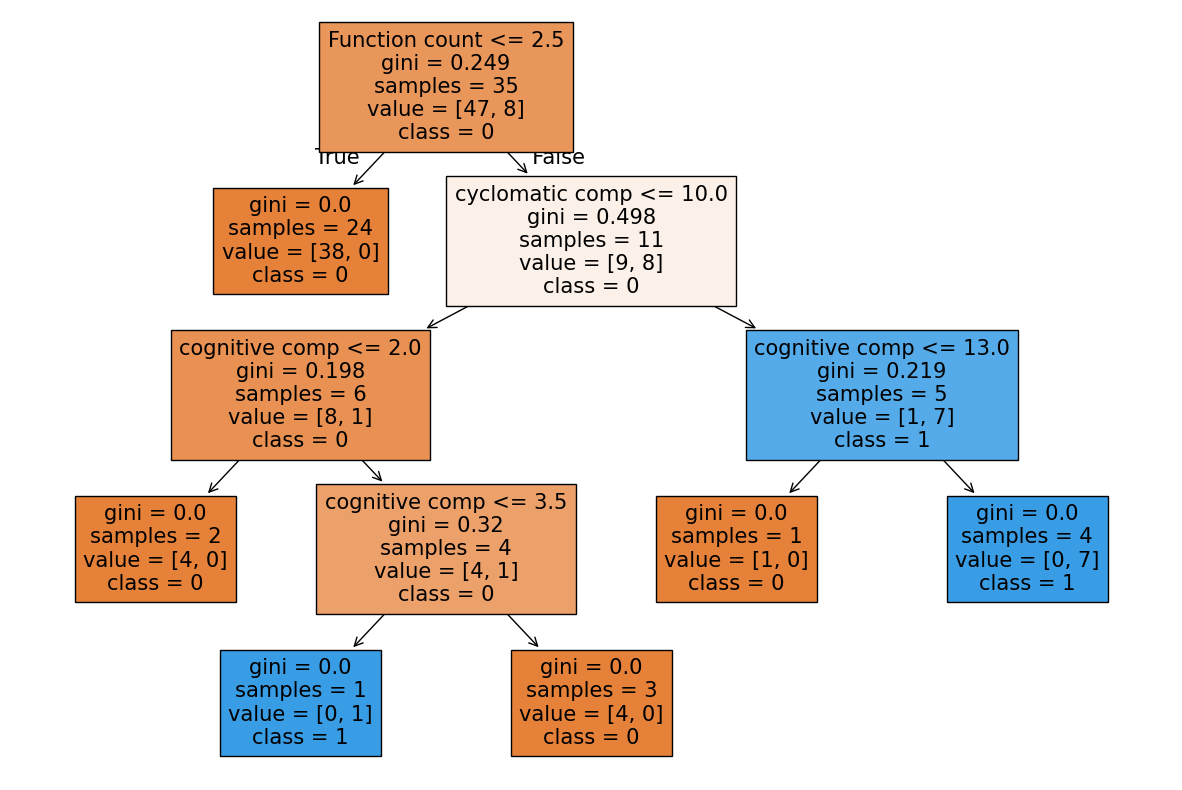

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 10))
plot_tree(rf_model.estimators_[0], feature_names=features, class_names=["0", "1"], filled=True)
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

X = df[features]
y = df["Need Refactoring"]
X = X.astype(np.float32).values
y = y.astype(np.float32).values
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

model = Sequential()
model.add(Dense(8, activation='relu', input_shape=(X_train.shape[1],)))

model.add(Dense(4, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=2,
    validation_data=(X_test, y_test),
    verbose=1
)

y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype("int32").ravel()  # flatten to 1D
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.2f}")

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


28/28 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.8930 - loss: 1.2096 - val_accuracy: 0.6429 - val_loss: 6.4983
Epoch 2/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8294 - loss: 1.4831 - val_accuracy: 0.6429 - val_loss: 6.0642
Epoch 3/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8828 - loss: 1.2920 - val_accuracy: 0.6429 - val_loss: 5.6876
Epoch 4/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8646 - loss: 1.4928 - val_accuracy: 0.6429 - val_loss: 5.2844
Epoch 5/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8369 - loss: 1.2313 - val_accuracy: 0.6429 - val_loss: 4.9833
Epoch 6/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7432 - loss: 1.6397 - val_accuracy: 0.6429 - val_loss: 4.6357
Epoch 7/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9099 - loss: 0.7477 - val_accuracy: 0.6429 - val_loss: 4.4019
Epoch 8/50
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8922 - loss: 1.0356 - val_accuracy: 0.6429 - val_loss: 4.0395
Ep

In [ ]:
X_test = test_df[features].astype(np.float32).values

if "Need Refactoring" in test_df.columns:
    y_test = test_df["Need Refactoring"].values
else:
    y_test = None  # If no labels are provided

y_test_pred_prob = model.predict(X_test)
y_test_pred = (y_test_pred_prob > 0.5).astype("int32").ravel()

if y_test is not None:
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("\n=== Test Evaluation ===")
    print(f"Test Accuracy: {test_accuracy:.2f}")
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
else:
    print("\nPredictions on Test Data:")
    print(y_test_pred)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 

=== Test Evaluation ===
Test Accuracy: 0.97
Confusion Matrix:
[[37  0]
 [ 1  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        37
           1       0.00      0.00      0.00         1

    accuracy                           0.97        38
   macro avg       0.49      0.50      0.49        38
weighted avg       0.95      0.97      0.96        38



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
['ImageStorageServiceImpl' 'AuthServiceImpl' 'LoginActivity'
 'Playviewmodel' 'AnswerController']